# AFRL Distance Metrics
### AFRL: Austin Copeland, Kaitlyn Arnold, Jaime Schmidt, Hunter Baldwin, Bella Said

## Abstract

After rating how each individual thought about every other project and how it correlates to their own, we are able to make a distance matrix. This distance matrix will help to show us if different teams thought their projects matched up or not. If everyone had the same perception of what projects were similar, the distance matrix would be symmertic. However, that is not the case here. Some teams may have thought their project was very similar to one team, but the other team may have thought that the projects were nothing alike. Or two teams could have both agreed that their projects were very similar. Even though the distance matrix was not perfectly symetric, we were able to find that there is a strong correlation between what teams thought about each others projects.

## Data input


In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/colbrydi/CMSE495_2022_Distance_Measures/main/2022_Project_distance_Matrix.csv")
df.head()

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
0,7,4,9,8,3,0,6,2,5,1
1,0,1,3,2,4,8,6,5,7,9
2,3,2,1,6,0,8,5,4,7,9
3,8,7,3,9,4,5,0,6,1,2
4,0,2,1,8,7,3,9,6,4,5


## Data Cleaning


Creating a dictionary containing a key for each team and their respective set of reviews

In [11]:
names = df.columns
all_dict = dict()
for n in names:
    all_dict[n] = []
for index, row in df.iterrows():
    name = ""
    for n in names:
        if row[n] == 0:
            name = n
            break
    all_dict[name] += [row]
all_dict

{'ARFL': [ARFL            0
  Argonne         1
  Boeing          3
  Delta Dental    2
  Ford            4
  Hope Village    8
  Kellogg's       6
  Neogen          5
  Old Nation      7
  Qside           9
  Name: 1, dtype: int64,
  ARFL            0
  Argonne         2
  Boeing          1
  Delta Dental    8
  Ford            7
  Hope Village    3
  Kellogg's       9
  Neogen          6
  Old Nation      4
  Qside           5
  Name: 4, dtype: int64,
  ARFL            0
  Argonne         4
  Boeing          1
  Delta Dental    7
  Ford            2
  Hope Village    8
  Kellogg's       5
  Neogen          3
  Old Nation      6
  Qside           9
  Name: 14, dtype: int64,
  ARFL            0
  Argonne         5
  Boeing          9
  Delta Dental    2
  Ford            1
  Hope Village    3
  Kellogg's       8
  Neogen          4
  Old Nation      7
  Qside           6
  Name: 18, dtype: int64,
  ARFL            0
  Argonne         3
  Boeing          1
  Delta Dental    7
  Ford    

## Data Modeling

Calculating the distance metrics from the above review dictionary, and assigning the averages to their respective positions in a distance matrix

In [8]:
dist_mat = np.zeros((len(names),len(names)))


for i in range(len(names)):
    n1 = names[i]
    for j in range(len(names)):
        n2 = names[j]
        dists = np.array([l[n2] for l in all_dict[n1]])
        dist_mat[i][j] = np.average(dists)
        

## Data Visualization

In [5]:
dist_df = pd.DataFrame(dist_mat, columns = names) 
dist_df.index = [n + " -> " for n in names]
dist_df

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
ARFL ->,0.000000,3.000000,3.000000,5.200000,4.000000,6.200000,6.600000,4.000000,5.600000,7.400000
Argonne ->,2.666667,0.000000,1.666667,3.333333,6.666667,5.333333,8.000000,6.000000,5.000000,6.333333
Boeing ->,3.200000,2.600000,0.000000,6.200000,4.600000,8.000000,5.600000,2.600000,5.800000,6.400000
Delta Dental ->,1.666667,7.333333,6.000000,0.000000,6.666667,5.333333,7.333333,4.000000,3.000000,3.666667
Ford ->,2.500000,2.500000,2.833333,5.666667,0.000000,7.666667,6.166667,3.833333,6.833333,7.000000
Hope Village ->,6.200000,5.400000,7.200000,6.400000,7.200000,0.000000,4.600000,4.400000,2.000000,1.600000
Kellogg's ->,4.333333,5.666667,4.333333,8.333333,7.000000,5.333333,0.000000,4.666667,4.000000,1.333333
Neogen ->,3.666667,4.000000,3.333333,7.000000,5.666667,5.333333,7.333333,0.000000,3.666667,5.000000
Old Nation ->,6.000000,5.250000,7.500000,6.250000,6.250000,1.250000,7.500000,3.250000,0.000000,1.750000
Qside ->,3.500000,3.500000,6.000000,7.000000,8.000000,1.500000,6.000000,8.000000,1.500000,0.000000


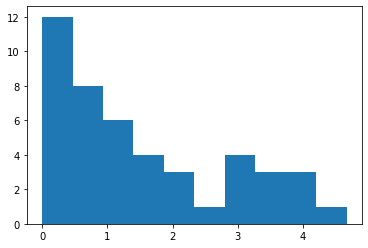

[[1.         0.43035602]
 [0.43035602 1.        ]]


In [6]:
errors = []
for i in range(len(names)):
    for j in range(i+1, len(names)):
        errors += [abs(dist_mat[i][j]-dist_mat[j][i])]
            
import matplotlib.pyplot as plt

plt.hist(errors, bins=10)
plt.show()

my_rho = np.corrcoef([i for i in dist_mat.flatten() if i], [i for i in np.transpose(dist_mat).flatten() if i])

print(my_rho)

## Conclusion

This was looking at the difference between similarity that each team saw between their projects. For example, we viewed the difference between our project and Argonne's as 3.0. They viewed the difference between our projects as 2.667. This resulted in an error on 0.333. We then created a histogram displaying the errors. This was able to show that most of the teams had small amounts of error, meaning they had similar views. There were very few that had large amounts of errors. This also led to us calculating the correlation between the teams view points. We got a correlation value of about 0.43 which means that there is some correlation between teams and that it is a positive correlation. We also noticed that some of the extremes in error are coming from Qside. A lot of there results are very close or very far from the other teams. We think this could have to do with only having 2 sets of results from this group.